In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
# read dataset
cardio = pd.read_csv('data/data178153/cardio_train.csv',sep=';')
stroke = pd.read_csv('data/data178153/healthcare-dataset-stroke-data.csv')

# 1.Data pre-processing

In [3]:
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [4]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
# IF there are duplicated？
print('the duplicated number of cardio', cardio.duplicated().sum())
print('the duplicated number of stroke', stroke.duplicated().sum())

the duplicated number of cardio 0
the duplicated number of stroke 0


In [6]:
# fill none
stroke['bmi'] = stroke['bmi'].fillna(0)

In [7]:
# delete id
cardio.drop(['id'], axis=1, inplace=True)
stroke.drop(['id'], axis=1, inplace=True)

In [8]:
# process age, change age from day to year
cardio['age'] = cardio['age'].apply(lambda x: int(x/365))

# delete unreal data in ap_lo and ap_hi

# delete number <0
cardio = cardio[ (cardio['ap_lo'] >= 0) & (cardio['ap_hi'] >= 0) ]
# delete abnormal value
cardio = cardio[ (cardio['ap_lo'] <= 120) & (cardio['ap_hi'] <= 180) ] 
cardio = cardio[ (cardio['ap_lo'] < cardio['ap_hi']) ]  

In [9]:
#encode data which are not numberic  in stroke 
stroke['gender'] = stroke['gender'].replace(
    {
        'Male': 0,
        'Female': 1,
        'Other': 2
    }
)
stroke['ever_married'] = stroke['ever_married'].replace(
    {
        'No': 0,
        'Yes': 1
    }
)

stroke['Residence_type'] = stroke['Residence_type'].replace(
    {
        'Rural': 0,
        'Urban': 1
    }
)
stroke['work_type'] = stroke['work_type'].replace(
    {
        'children': 0,
        'Govt_job': 1,
        'Never_worked': 2,
        'Private': 3,
        'Self-employed': 4
    }
)
stroke['smoking_status'] = stroke['smoking_status'].replace(
    {
        'formerly smoked': 0,
        'never smoked': 1,
        'smokes': 2,
        'Unknown': 3
    }
)

# 2.select features

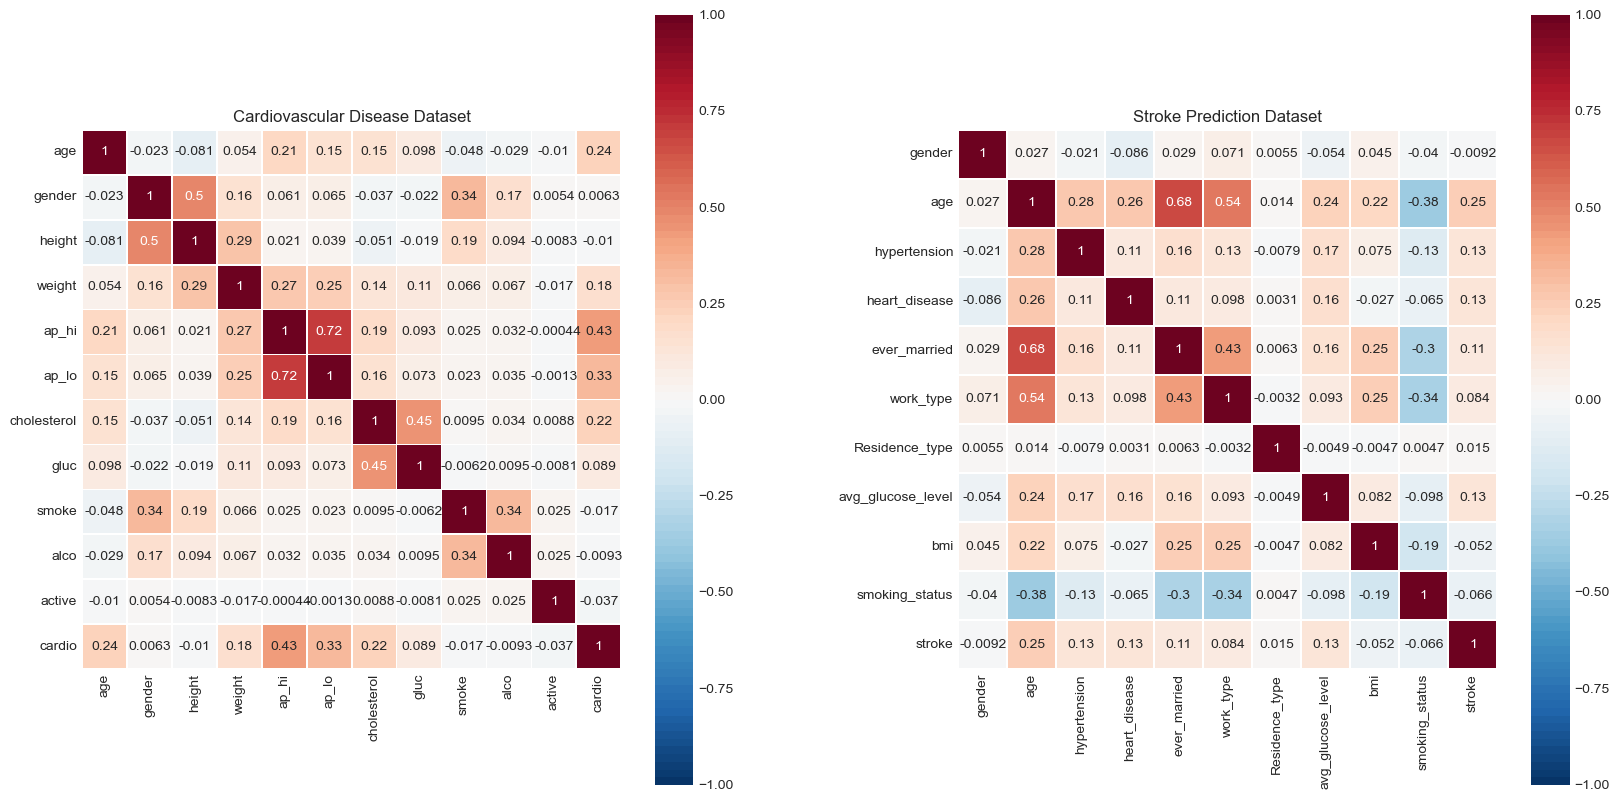

In [15]:
plt.style.use('seaborn-whitegrid')  

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
plt.subplots_adjust(wspace=0.3)  

sns.heatmap(cardio.corr(),
            vmin=-1, vmax=1,
            square=True,
            annot=True,  
            fmt='.2g',  
            cmap=sns.color_palette("RdBu_r", 100),
            linewidths=.5,
            ax=axes[0])  
axes[0].set_title('Cardiovascular Disease Dataset')  


sns.heatmap(stroke.corr(),
            vmin=-1, vmax=1,
            square=True,
            annot=True,  
            fmt='.2g',  
            cmap=sns.color_palette("RdBu_r", 100),
            linewidths=.5,
            ax=axes[1])  
axes[1].set_title('Stroke Prediction Dataset')  

plt.show()

In [13]:
cardio.to_csv('./data/cardio.csv', index=False)
stroke.to_csv('./data/stroke.csv', index=False)

In [10]:

cardio = pd.read_csv('data/cardio.csv',sep=',')
stroke = pd.read_csv('data/stroke.csv')

<Figure size 800x500 with 0 Axes>

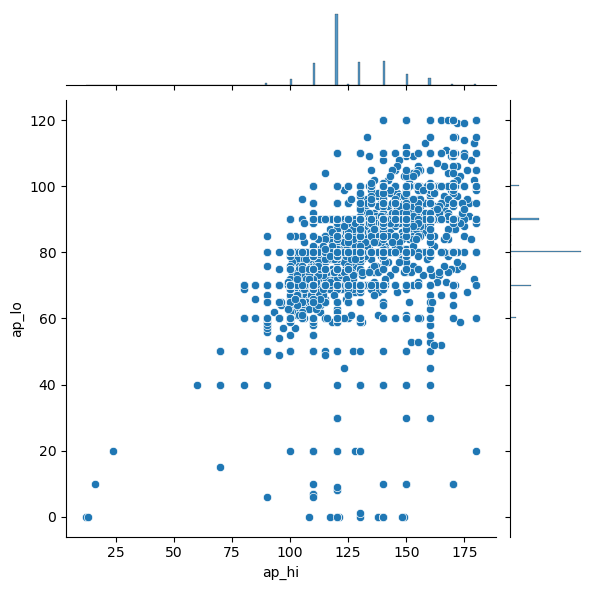

In [11]:
# scatter cardio 
plt.figure(figsize=(8, 5))
sns.jointplot(x='ap_hi', y='ap_lo', data=cardio)

<AxesSubplot:>

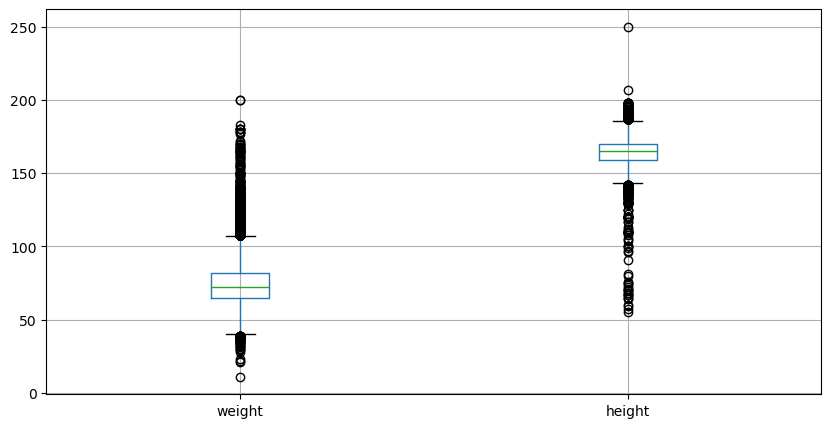

In [12]:
# cardio height
plt.figure(figsize=(10,5))
cardio.boxplot(['weight','height'])

[Text(0, 0, 'Male'), Text(1, 0, 'Female')]

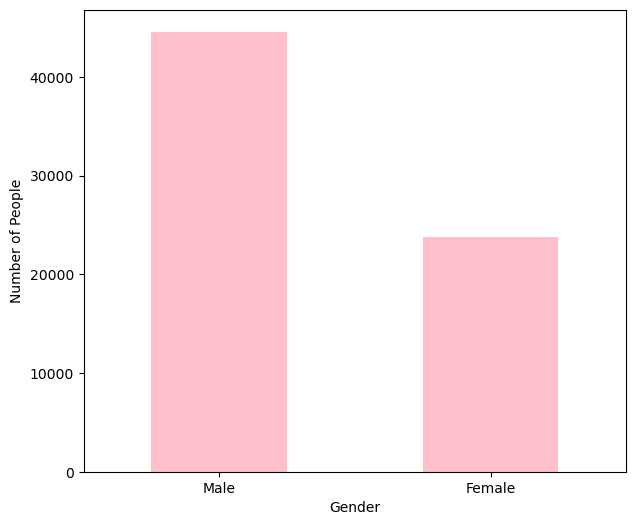

In [13]:
# cardio gender
gender = cardio['gender'].value_counts()
plt.figure(figsize=(7, 6))
ax = gender.plot(kind='bar', rot=0, color="pink")
ax.set_xlabel('Gender')
ax.set_ylabel('Number of People')
ax.set_xticklabels(('Male', 'Female'))

[Text(0, 0, 'Male'), Text(1, 0, 'Female')]

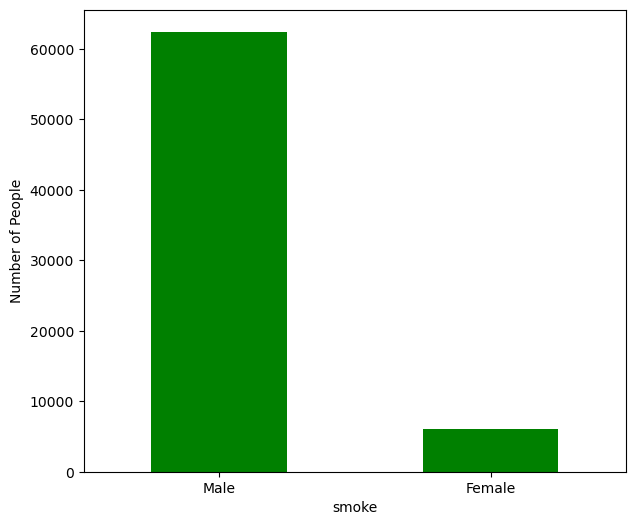

In [14]:
# cardio smoke
gender = cardio['smoke'].value_counts()
plt.figure(figsize=(7, 6))
ax = gender.plot(kind='bar', rot=0, color="g")
ax.set_xlabel('smoke')
ax.set_ylabel('Number of People')
ax.set_xticklabels(('Male', 'Female'))

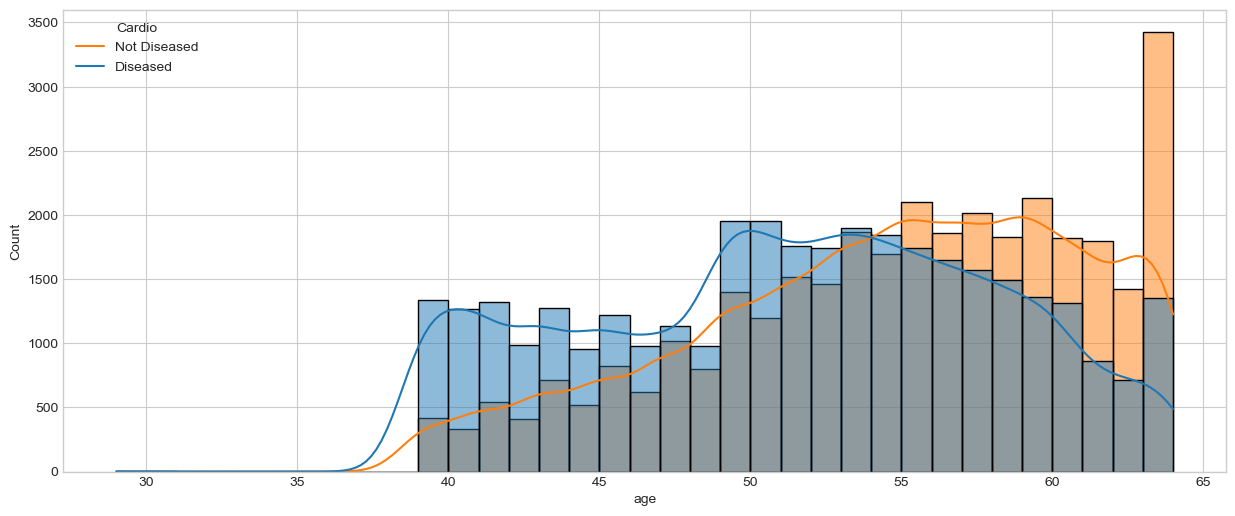

In [16]:

plt.figure(figsize=(15,6))
sns.histplot(data=cardio, x='age', hue='cardio', binwidth=1, kde=True, legend=True)
plt.xlabel('age')

plt.legend(title='Cardio', labels=['Not Diseased', 'Diseased'])
plt.show()

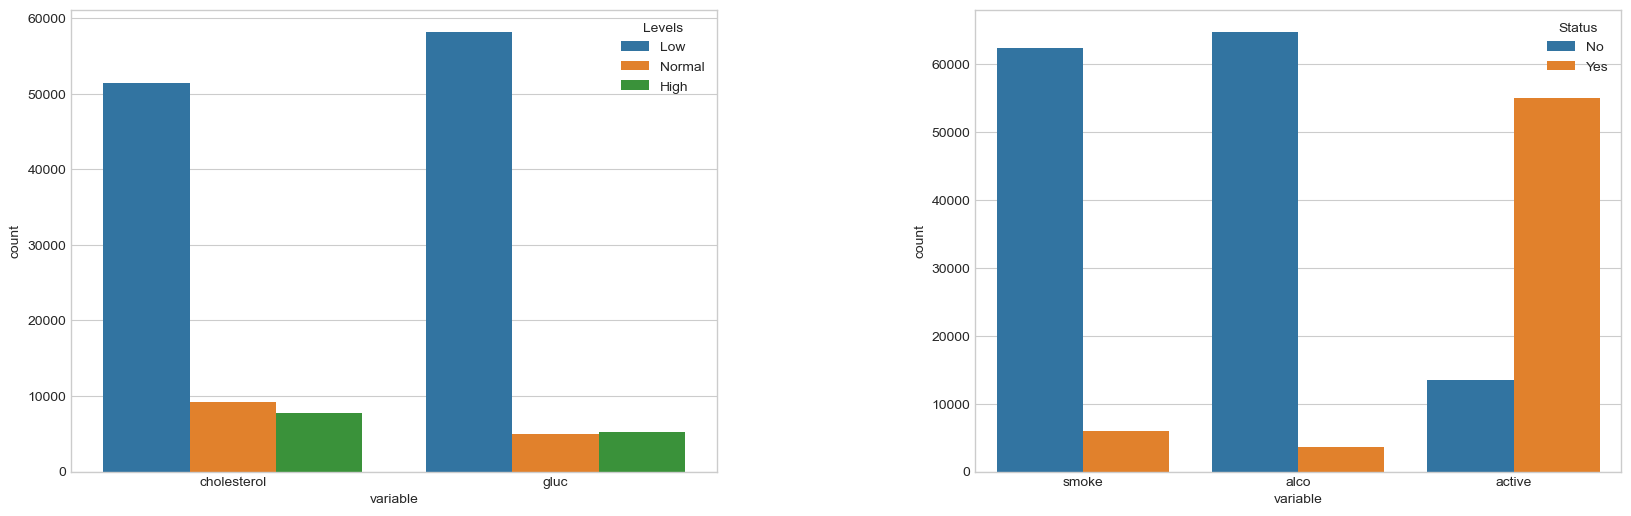

In [17]:
df_categorical = cardio.loc[:, ['cholesterol', 'gluc', 'smoke', 'alco', 'active']]
df_categorical_1 = df_categorical.loc[:, ['cholesterol', 'gluc']]
df_categorical_2 = df_categorical.loc[:, ['smoke', 'alco', 'active']]

legend_labels_1 = {
    'cholesterol': ['Low', 'Normal', 'High'],
    'gluc': ['Low', 'Normal', 'High']
}

legend_labels_2 = {
    'smoke': ['No', 'Yes'],
    'alco': ['No', 'Yes'],
    'active': ['No', 'Yes']
}

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
plt.subplots_adjust(wspace=0.4)  


sns.countplot(x="variable", hue="value", data=pd.melt(df_categorical_1), ax=axes[0])
axes[0].legend(title='Levels', labels=['Low', 'Normal', 'High'])


sns.countplot(x="variable", hue="value", data=pd.melt(df_categorical_2), ax=axes[1])
axes[1].legend(title='Status', labels=['No', 'Yes'])

plt.show()


## 2.stroke visualization

<Figure size 1000x800 with 0 Axes>

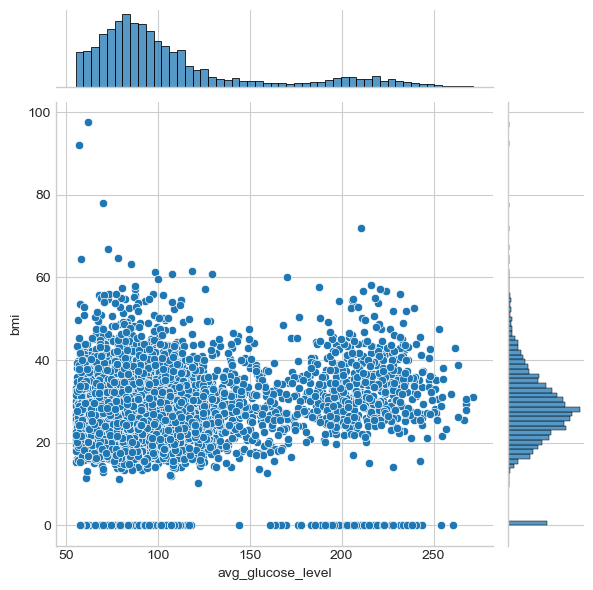

In [20]:
plt.figure(figsize=(10,8))
sns.jointplot(data = stroke, x = "avg_glucose_level", y = "bmi")

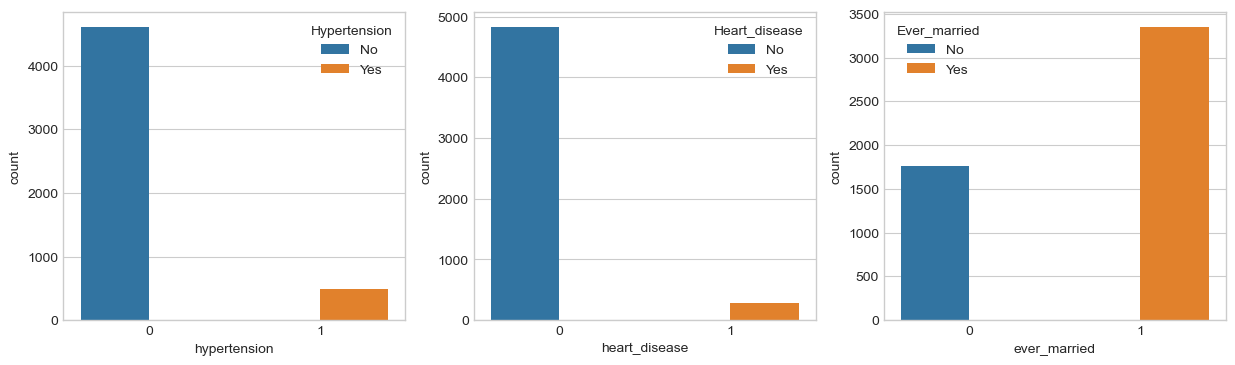

In [22]:
plt.figure(figsize=(15, 4))

variables = ['hypertension', 'heart_disease', 'ever_married']
legend_labels = {
    'hypertension': ['No', 'Yes'],
    'heart_disease': ['No', 'Yes'],
    'ever_married': ['No', 'Yes']
}

for i, var in enumerate(variables):
    plt.subplot(1, 3, i+1)
    sns.countplot(data=stroke, x=var, hue=var)
    plt.legend(title=var.capitalize(), labels=['No', 'Yes'])

plt.show()


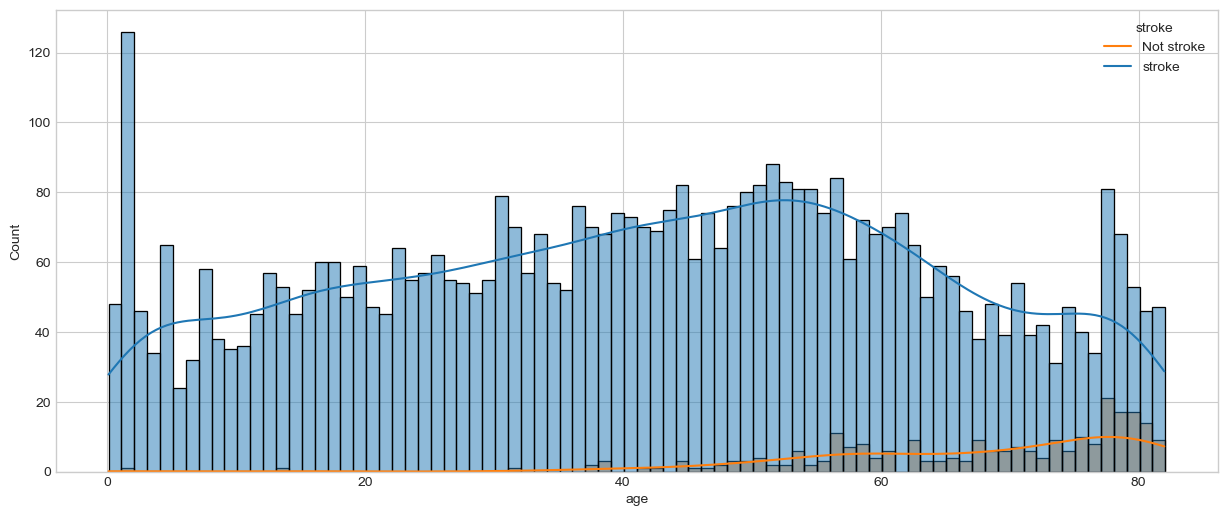

In [24]:
plt.figure(figsize=(15,6))
sns.histplot(data=stroke, x='age', hue='stroke', binwidth=1, kde=True, legend=True)
plt.xlabel('age')
plt.legend(title='stroke', labels=['Not stroke', 'stroke'])
plt.show()

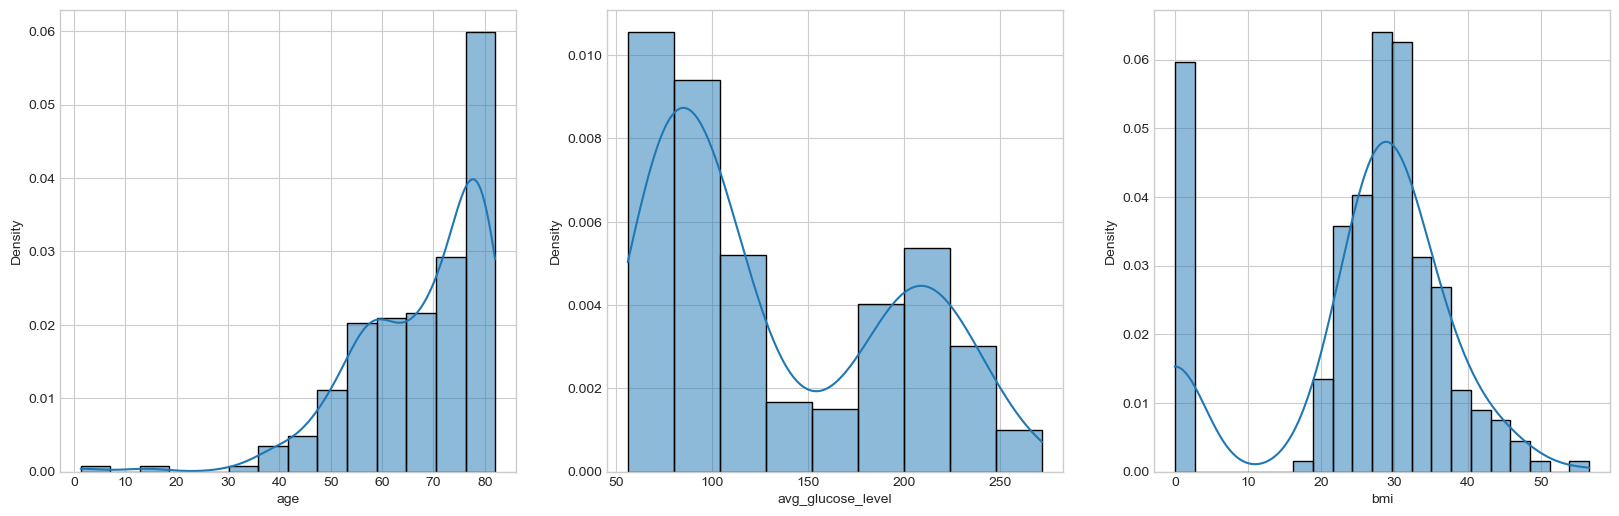

In [25]:
plt.figure(figsize = (20, 6))
plt.subplot(1, 3, 1);
sns.histplot(stroke.loc[stroke["stroke"] == 1]["age"], kde = True, stat = "density");

plt.subplot(1, 3, 2);
sns.histplot(stroke.loc[stroke["stroke"] == 1]["avg_glucose_level"], kde = True, stat = "density");

plt.subplot(1, 3, 3);
sns.histplot(stroke.loc[stroke["stroke"] == 1]["bmi"], kde = True, stat = "density");

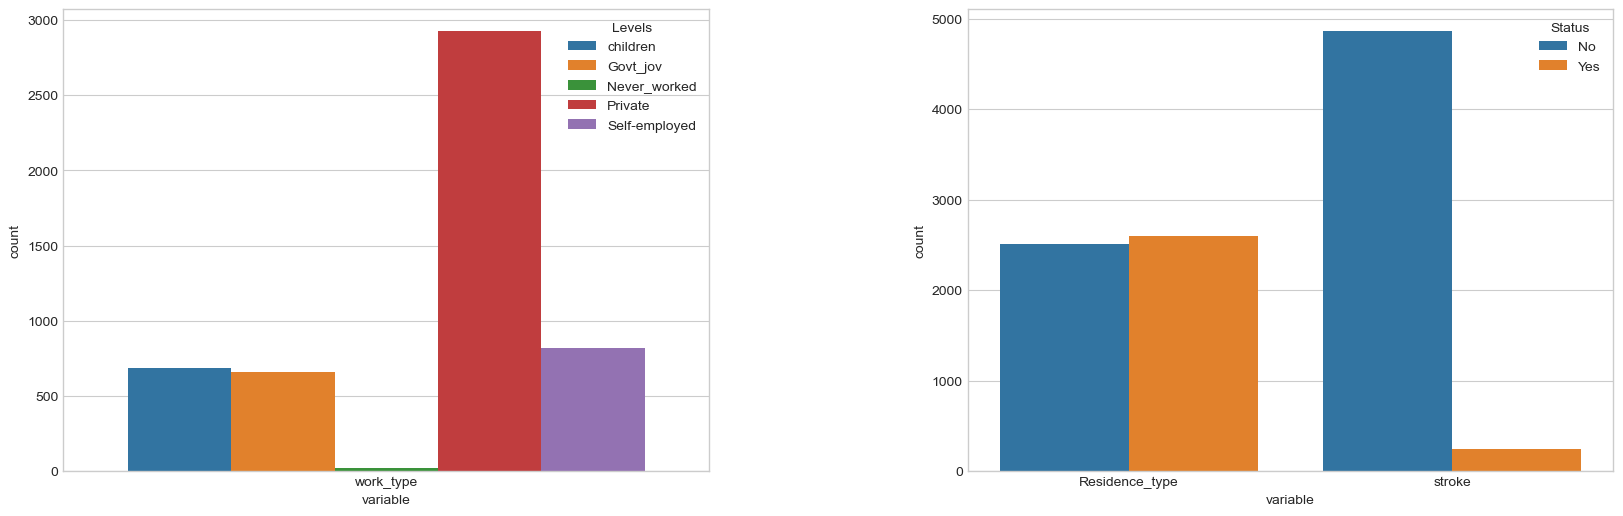

In [28]:
stroke_categorical = stroke.loc[:,['work_type','Residence_type', 'stroke']]
stroke_categorical_1 = stroke_categorical.loc[:, ['work_type']]
stroke_categorical_2 = stroke_categorical.loc[:, ['Residence_type', 'stroke']]

legend_labels_1 = {
    'work_type': ["children", "Govt_jov", "Never_worked", "Private", "Self-employed"],
}

legend_labels_2 = {
    'Residence_type': ['No', 'Yes'],
    'stroke': ['No', 'Yes'],
}

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
plt.subplots_adjust(wspace=0.4)  


sns.countplot(x="variable", hue="value", data=pd.melt(stroke_categorical_1), ax=axes[0])
axes[0].legend(title='Levels', labels=["children", "Govt_jov", "Never_worked", "Private", "Self-employed"])


sns.countplot(x="variable", hue="value", data=pd.melt(stroke_categorical_2), ax=axes[1])
axes[1].legend(title='Status', labels=['No', 'Yes'])

plt.show()
